(932, 2261)
Index([                    0, 'Compound_Identifier',              'Source',
                    'SMILES',             'LogS.M.',                  'MW',
                       'AMW',                  'Sv',                  'Se',
                        'Sp',
       ...
              'Psychotic-80',        'Psychotic-50',        'Hypertens-80',
              'Hypertens-50',         'Hypnotic-80',         'Hypnotic-50',
             'Neoplastic-80',       'Neoplastic-50',        'Infective-80',
        'Infective-50\r\r\n'],
      dtype='object', length=2261)
(932, 2256)
(932,)


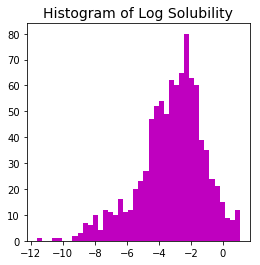

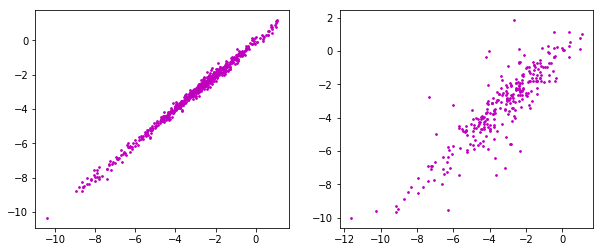

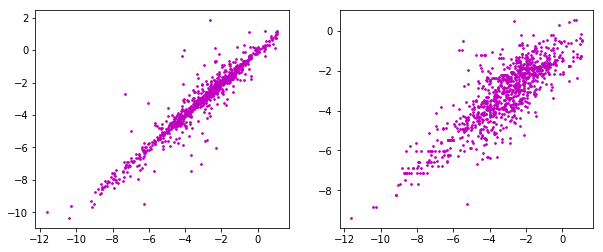

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from sklearn import datasets
import seaborn as sns 
import pandas as pd
from sklearn.linear_model import LinearRegression

sol = pd.read_excel("Husskonen_Solubility_Features.xlsx", verbose=False)
print(sol.shape)
print(sol.columns)
t = sol["LogS.M."].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(t, bins=40, facecolor='m')
ax.set_title("Histogram of Log Solubility", fontsize=14)

X = sol[sol.columns[5:len(sol.columns)]]
X2 = sol[sol.columns[5:14]]
N, p = X.shape
N2,p2=X2.shape
print(X.shape)
print(t.shape)
# Split data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
# Regularized regression
#
gamma = 2.3
w = np.linalg.inv(X_train.T @ X_train + gamma*np.identity(p)) @ X_train.T @ t_train
th_train = X_train @ w
th_test = X_test @ w

X2_train, X2_test, t2_train, t2_test = train_test_split(X2, t, test_size=0.3)
# Regularized regression
#
gamma = 2.3
w2 =np.linalg.inv(X2_train.T @ X2_train + gamma*np.identity(p2)) @ X2_train.T @ t2_train
th2_train = X2_train @ w2
th2_test = X2_test @ w2

th_X = X @ w
th_X2 = X2 @ w2
# Plot training and test predictions
#
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t_train, th_train, c='m', s=3)
ax[1].scatter(t_test, th_test, c='m', s=3)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(t, th_X, c='m', s=3)
ax[1].scatter(t, th_X2, c='m', s=3)
# ... plots
#
# Over to you for implementing Lasso